# Notebook to Download and Process Lidar Data 

From here: "https://data.airbornesnowobservatories.com/basin/tuolumne/2020"

# Step 0 Set up Notebook 

In [18]:
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr 
import rioxarray as rxr
import pyproj
import json
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import griddata
from snowML.datapipe.utils import get_geos as gg
from snowML.datapipe import get_lidar_data as lidar
from snowML.datapipe.utils import snow_types as st 
from snowML.viz import vis_utils as vu
from snowML.datapipe.utils import data_utils as du 

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1 - Define New Functions 

In [26]:
def add_day_dimension(ds: xr.DataArray | xr.Dataset, day_str: str) -> xr.DataArray | xr.Dataset:
    
    # Expand with a new dimension called "day"
    day = np.datetime64(pd.to_datetime(day_str), 'ns')
    
    # Expand with a new dimension called "day"
    ds_expanded = ds.expand_dims({"day": [day]})
    
    return ds_expanded

In [15]:
def extract_date_from_filename(filename: str) -> str:
    # Look for a pattern like '2020May21' in the filename
    match = re.search(r'(\d{4}[A-Za-z]{3}\d{2})', filename)
    if not match:
        raise ValueError("Date string in format 'YYYYMonDD' not found in filename.")

    date_str = match.group(1)
    # Convert to datetime object
    date_obj = datetime.strptime(date_str, "%Y%b%d")
    
    # Return in 'YYYY-MM-DD' format
    return date_obj.strftime("%Y-%m-%d")

# Step 2 - Load and Process One Example 

In [29]:
# Load one TimeSlice 
f = "../../lidar_data/ASO_Lidar/ASO_Tuolumne_Eleanor_2020May21-23_swe_50m.tif" 
day = extract_date_from_filename(f)
ds = lidar.get_one_timeslice(f)
ds_new = add_day_dimension(ds, day)
ds_new

<xarray.Dataset> Size: 6MB
Dimensions:      (day: 1, x: 1439, y: 990)
Coordinates:
  * day          (day) datetime64[ns] 8B 2020-05-21
  * x            (x) float64 12kB -119.9 -119.9 -119.9 ... -119.2 -119.2 -119.2
  * y            (y) float64 8kB 37.72 37.72 37.72 37.72 ... 38.24 38.24 38.24
    band         int64 8B 1
    spatial_ref  int64 8B 0
Data variables:
    SWE          (day, y, x) float32 6MB nan nan nan nan nan ... nan nan nan nan

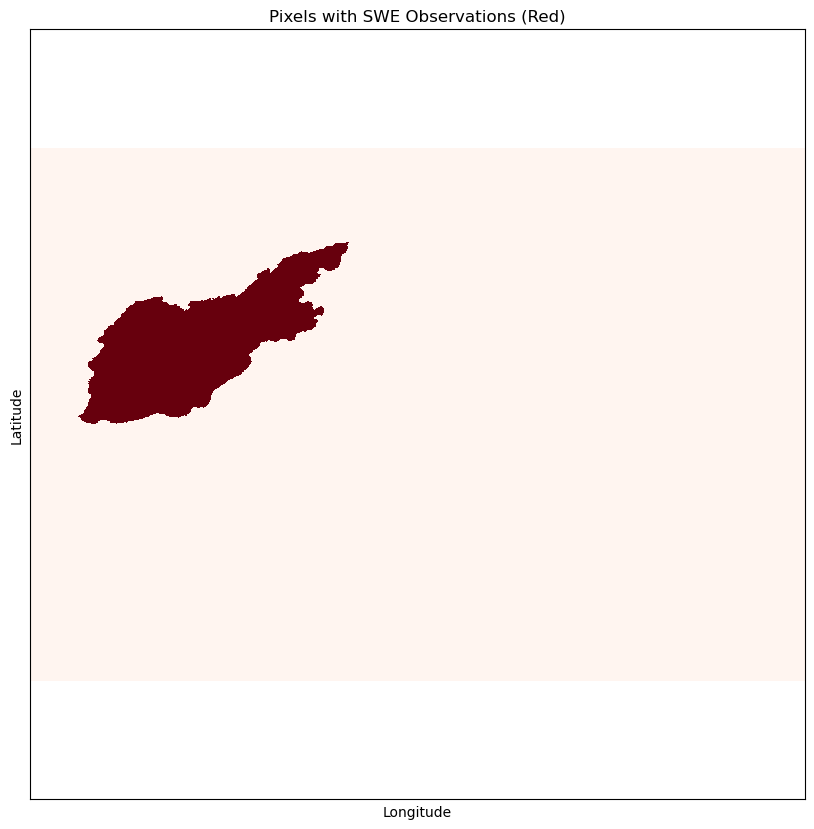

In [28]:
# plot to see where data is located 
lidar.plot_valid_pixels(ds_new)

In [39]:
geos = gg.get_geos("18040009", '12')
hucs = list(geos["huc_id"])
len(hucs)

57

In [41]:
# crop to a sample huc12 and replot
huc_id = "180400090303"
ds_small =  lidar.subset_by_huc(ds_new, huc_id)
ds_small

<xarray.Dataset> Size: 138kB
Dimensions:      (day: 1, x: 165, y: 204)
Coordinates:
  * day          (day) datetime64[ns] 8B 2020-05-21
  * x            (x) float64 1kB -119.9 -119.9 -119.9 ... -119.8 -119.8 -119.8
  * y            (y) float64 2kB 37.99 37.99 37.99 37.99 ... 38.09 38.1 38.1
    band         int64 8B 1
    spatial_ref  int64 8B 0
Data variables:
    SWE          (day, y, x) float32 135kB nan nan nan nan ... nan nan nan nan

In [42]:
lidar.count_na(ds_small) 

for day All:
Number of NaN values: 18233
Percent of NaN values: 54.17%


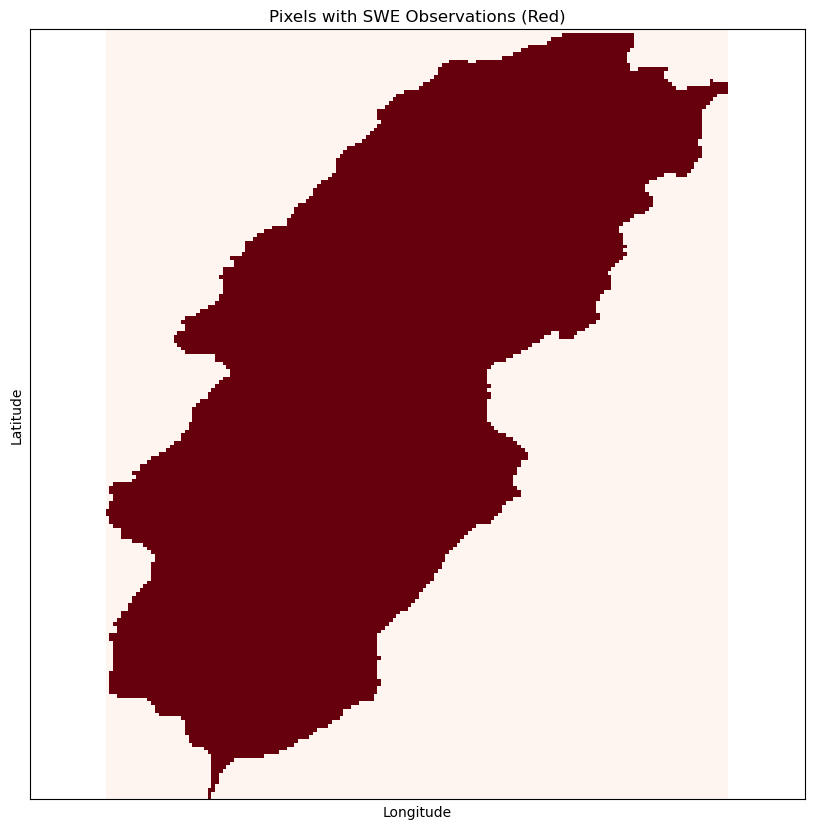

In [43]:
lidar.plot_valid_pixels(ds_small)

In [40]:
for huc_id in hucs: 
    ds_small =  lidar.subset_by_huc(ds_new, huc_id)
    print(f"for Huc: {huc_id}")
    lidar.count_na(ds_small) 
    

for Huc: 180400090101
for day All:
Number of NaN values: 78144
Percent of NaN values: 100.00%
for Huc: 180400090102
for day All:
Number of NaN values: 64753
Percent of NaN values: 100.00%
for Huc: 180400090103
for day All:
Number of NaN values: 35076
Percent of NaN values: 100.00%
for Huc: 180400090104
for day All:
Number of NaN values: 47376
Percent of NaN values: 100.00%
for Huc: 180400090105
for day All:
Number of NaN values: 97335
Percent of NaN values: 100.00%
for Huc: 180400090106
for day All:
Number of NaN values: 36735
Percent of NaN values: 100.00%
for Huc: 180400090107
for day All:
Number of NaN values: 122512
Percent of NaN values: 100.00%
for Huc: 180400090201
for day All:
Number of NaN values: 96089
Percent of NaN values: 100.00%
for Huc: 180400090202
for day All:
Number of NaN values: 55475
Percent of NaN values: 100.00%
for Huc: 180400090301
for day All:
Number of NaN values: 63243
Percent of NaN values: 66.41%
for Huc: 180400090302
for day All:
Number of NaN values: 792

NoDataInBounds: No data found in bounds. Data variable: SWE